# Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV

# Variables/Predictors

In [3]:
# import data
df = pd.read_csv('Customer.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Membership,Total Spend,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,64,694,1617,0,0,0,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,67,144,27,0,0,0,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,56,343,776,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,37,170,53,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,40,192,422,0,0,1,1,0,0


In [4]:
df.dtypes

Income                    float64
Kidhome                     int64
Teenhome                    int64
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
AcceptedCmp3                int64
AcceptedCmp4                int64
AcceptedCmp5                int64
AcceptedCmp1                int64
AcceptedCmp2                int64
Complain                    int64
Response                    int64
Age                         int64
Membership                  int64
Total Spend                 int64
Education_Basic             int64
Education_Master            int64
Education_PhD               int64
Marital_Status_Married      int64
Marital_Status

In [5]:
df.shape

(2212, 31)

In [6]:
# target variable
y = df['Response']

# predictor columns
X = df.drop(columns='Response')

# Models

## Original Data

In [7]:
# test train split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check shapes
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

#check the mean of test and train
print(f"Train Probablity of Response: {y_train.mean()}")
print(f"Test Probablity of Response: {y_test.mean()}")

# as can see very imbalaced data at 15:85 ratio as more people did not accept the offers in the campaigns

X_train: (1548, 30)
y_train: (1548,)
X_test: (664, 30)
y_test: (664,)
Train Probablity of Response: 0.14470284237726097
Test Probablity of Response: 0.16566265060240964


### Logistic Regression

In [48]:
# create function to add metrics to empty df to compare results

# create empty dict with columns
data = {'Model':[], 'Data_set':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'Confusion Matrix':[]}
# Create DataFrame
metrics_df = pd.DataFrame(data)

def add_metrics(model, data_set, y_train, y_pred):
    '''
    Function: Calculates the metrics from your y train/test results and appends results to a df
    '''
    #calculating metrics scores
    scores = {'Model':[model], 'Data_set':[data_set], 'Accuracy':[metrics.accuracy_score(y_train, y_pred)],
              'Precision':[metrics.precision_score(y_train, y_pred)],
              'Recall':[metrics.recall_score(y_train, y_pred)], 'Confusion Matrix':[metrics.confusion_matrix(y_train, y_pred)]}
    # add metrics into df
    scores_df = pd.DataFrame(scores)
    return scores_df

In [22]:
# finding the best params for model

# setting params
lr_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

# setting base Logistic regression estimator model
model = LogisticRegression(max_iter=4000, random_state=42)

# using grid search cv
gs_lr = GridSearchCV(model,
                     param_grid=lr_params,
                     scoring='accuracy',
                     cv = 5)

# fitting model with training set
gs_lr.fit(X_train, y_train)

# getting the best params
gs_lr.best_params_

# errors are due to l1 penalty only working with 'liblinear' solver

C:\Users\alice\anaconda3\envs\iod\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alice\anaconda3\envs\iod\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alice\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alice\anaconda3\envs\iod\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _chec

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [10]:
# Create Logistic Regression Model
model = LogisticRegression(C= 1, penalty='l1', solver='liblinear', max_iter=3000, random_state=1)

# Fit Model
model.fit(X_train, y_train)

# predict the train set data
y_train_pred = model.predict(X_train)

# finding the scores between y_train and y_predicted
print(f"Logistic Regression Model - Train Set")
print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(y_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, y_train_pred)}")

# accuracy score is not bad however the recall score is quite low due to imbalance

Logistic Regression Model - Train Set
Accuracy: 0.86
Precision Score: 0.56
Recall Score: 0.24
Confusion Matrix: [[1282   42]
 [ 170   54]]


In [149]:
# Check Coefficicent
model.coef_

array([[-5.00555309e-06,  1.84985795e-01, -8.59649677e-01,
        -2.96391006e-02, -1.41091695e-04,  1.43058251e-03,
         1.66552087e-03, -4.04709561e-04,  1.02832015e-03,
         1.26406000e-03,  1.35314401e-01,  1.14920176e-01,
         1.06398105e-02, -1.90598220e-01,  7.18397820e-02,
         1.93922206e+00,  1.14079556e+00,  1.81620558e+00,
         1.48099642e+00,  5.39093385e-01,  0.00000000e+00,
         8.20648068e-03,  3.94949462e-03,  4.81362061e-04,
        -7.82015171e-01,  2.02608360e-01,  1.13829892e+00,
        -1.32853718e+00,  6.47469501e-02,  0.00000000e+00]])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'AcceptedCmp3'),
  Text(1, 0, 'AcceptedCmp5'),
  Text(2, 0, 'AcceptedCmp1'),
  Text(3, 0, 'AcceptedCmp4'),
  Text(4, 0, 'Education_PhD'),
  Text(5, 0, 'AcceptedCmp2'),
  Text(6, 0, 'Education_Master'),
  Text(7, 0, 'Kidhome'),
  Text(8, 0, 'NumDealsPurchases'),
  Text(9, 0, 'NumWebPurchases'),
  Text(10, 0, 'NumWebVisitsMonth'),
  Text(11, 0, 'Marital_Status_Single'),
  Text(12, 0, 'NumCatalogPurchases'),
  Text(13, 0, 'Age'),
  Text(14, 0, 'Membership'),
  Text(15, 0, 'MntMeatProducts'),
  Text(16, 0, 'MntFruits'),
  Text(17, 0, 'MntGoldProds'),
  Text(18, 0, 'MntSweetProducts'),
  Text(19, 0, 'Total Spend'),
  Text(20, 0, 'Marital_Status_Widow'),
  Text(21, 0, 'Complain'),
  Text(22, 0, 'Income'),
  Text(23, 0, 'MntWines'),
  Text(24, 0, 'MntFishProducts'),
  Text(25, 0, 'Recency'),
  Text(26, 0, 'NumStorePurchases'),
  Text(27, 0, 'Ed

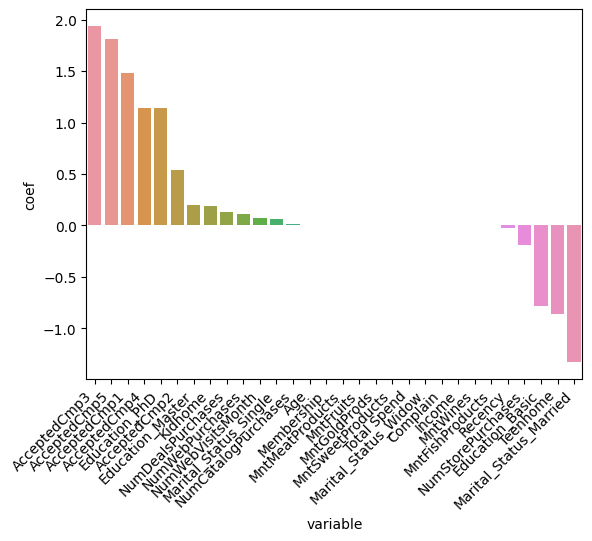

In [184]:
# coefs of model
model_coefs = pd.DataFrame({'variable': X.columns, 'coef': model.coef_.flatten()})
model_coefs.sort_values('coef', inplace=True, ascending=False)
sns.barplot(x='variable', y='coef', data=model_coefs)
plt.xticks(rotation=45, ha='right')

In [8]:
import shap
shap.initjs()

C:\Users\alice\anaconda3\envs\iod\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import xgboost as xgb
#Train model
clf = xgb.XGBClassifier(random_state=42) 
model = clf.fit(X, y)

#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

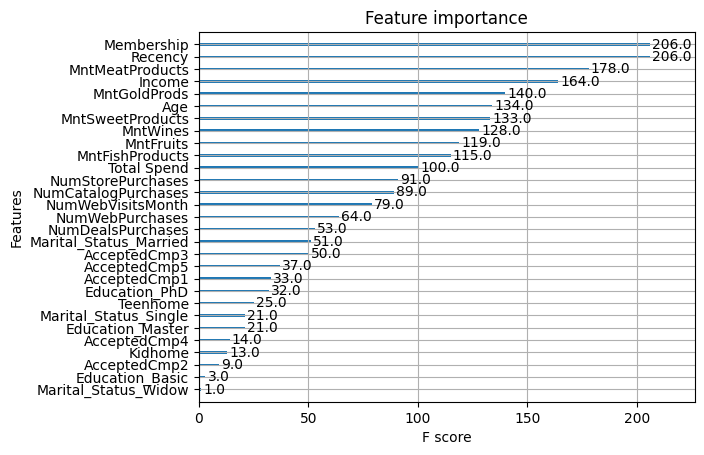

In [15]:
# plot feature importance
xgb.plot_importance(model)

# membership/recency is equally high

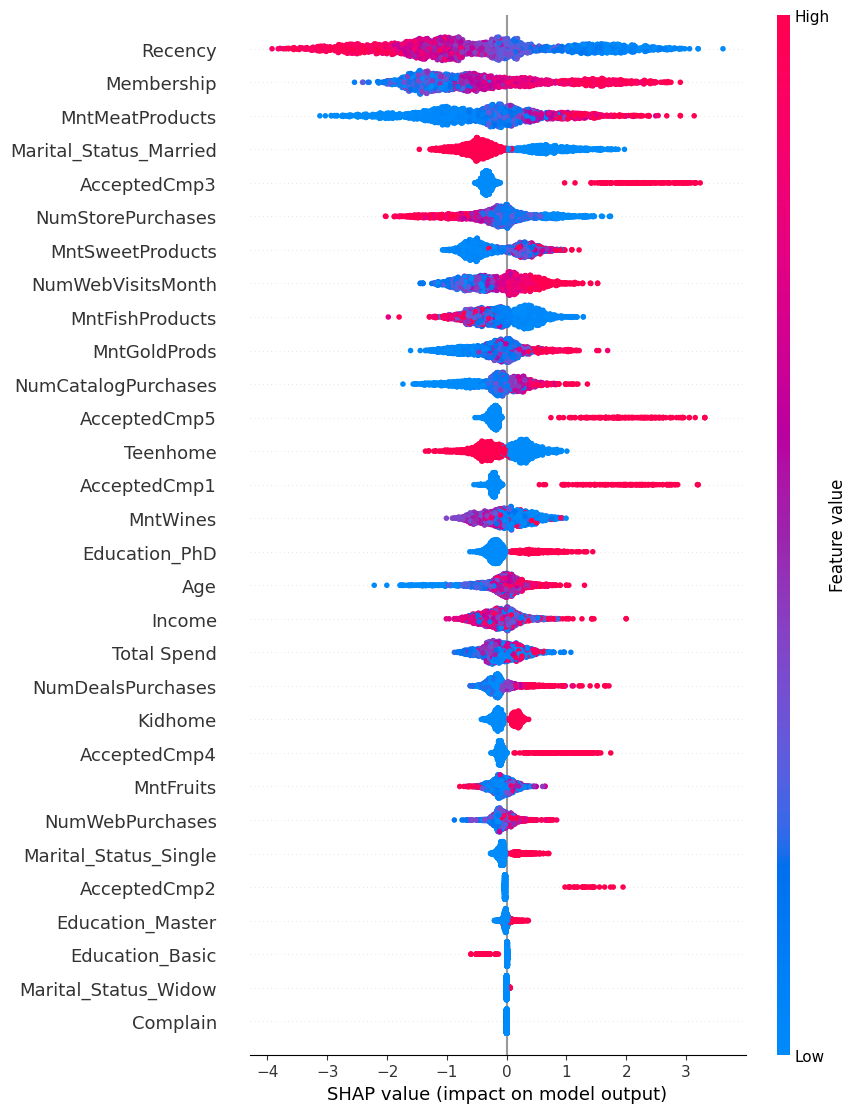

In [18]:
# bee swarm plot of shap values
shap.plots.beeswarm(shap_values, max_display=31)

# the more recent the customers purchase the more likely they are to accept the more recent campaign.
    # which makes a lot of sense, how are they going to use it if they didn't purchase from or set foot in the store.
# the more loyal they are to the store (based on membership) the more likely they are going to accept a campaign from them.
    # this could be due to them knowing about the campaign compared to new/first time shoppers
# the campaign could be something to do with meat products, hence more sales towards it.

In [49]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Logistic Regression', 'Train Set', y_train, y_train_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"


In [25]:
# predict the test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy scores
print(f"Logistic Regression Model - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# Recall is pretty low due to imbalance

Logistic Regression Model - Test Set
Accuracy: 0.89
Precision Score: 0.73
Recall Score: 0.51
Confusion Matrix: [[533  21]
 [ 54  56]]


In [50]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Logistic Regression', 'Test Set', y_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"


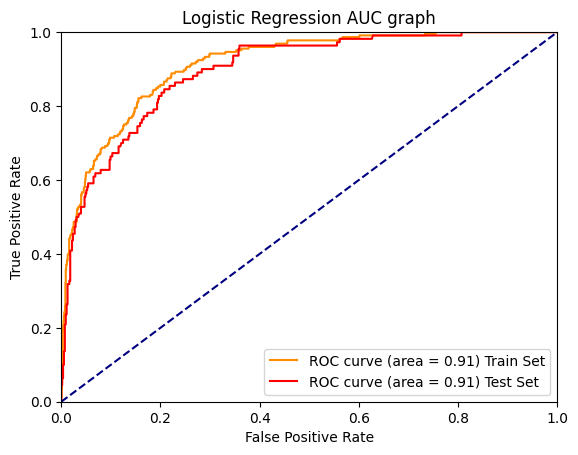

In [42]:
# predict probability
y_test_prob = model.predict_proba(X_test)[:,1]
y_train_prob = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_prob)
fpr_t, tpr_t, __t = metrics.roc_curve(y_test, y_test_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)
roc_auc_t = metrics.auc(fpr_t, tpr_t)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot(fpr_t, tpr_t, color='red', label = 'ROC curve (area = %0.2f) Test Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression AUC graph')
plt.legend(loc = "lower right")
plt.show()

### Naive Bayes

In [43]:
# trying other models such as Naive Bayes
model = GaussianNB()

# Fit ridge Model
model.fit(X_train, y_train)

# predict the train set data
y_train_pred = model.predict(X_train)

# finding the scores between y_train and y_predicted with threshold
print(f"Naive Bayes Model - Train Set")
print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(y_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, y_train_pred)}")

# accuracy, precision is lower compared to Logistic Regression
# However recall was surprising high

Naive Bayes Model - Train Set
Accuracy: 0.77
Precision Score: 0.32
Recall Score: 0.51
Confusion Matrix: [[1083  241]
 [ 109  115]]


In [51]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Naive Bayes', 'Train Set', y_train, y_train_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"


In [44]:
# predict the test set data
y_test_pred = model.predict(X_test)

# finding the scores between y_test and y_predicted
print(f"Naive Bayes Model - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# similar to train set

Naive Bayes Model - Test Set
Accuracy: 0.76
Precision Score: 0.36
Recall Score: 0.55
Confusion Matrix: [[445 109]
 [ 49  61]]


In [52]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Naive Bayes', 'Test Set', y_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"


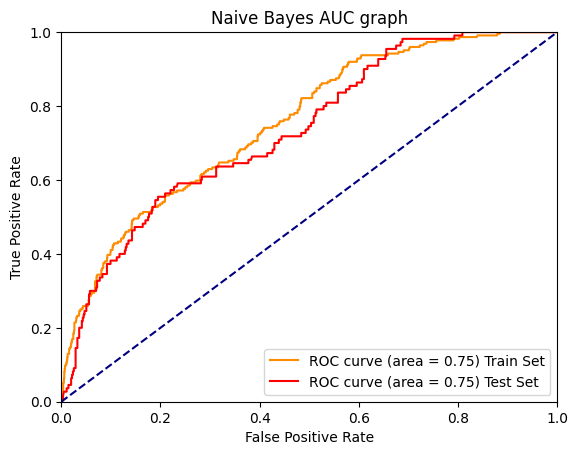

In [46]:
# predict probability
y_test_prob = model.predict_proba(X_test)[:,1]
y_train_prob = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_prob)
fpr_t, tpr_t, __t = metrics.roc_curve(y_test, y_test_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)
roc_auc_t = metrics.auc(fpr_t, tpr_t)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot(fpr_t, tpr_t, color='red', label = 'ROC curve (area = %0.2f) Test Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes AUC graph')
plt.legend(loc = "lower right")
plt.show()

### SVC

In [37]:
# finding the best params for model

# setting params
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

# setting base Logistic regression estimator model
model = svm.SVC(random_state=42)

# using grid search cv
svc_lr = GridSearchCV(model,
                     param_grid=svc_params,
                     scoring='accuracy',
                     cv = 5)

# fitting model with training set
svc_lr.fit(X_train, y_train)

# getting the best params
svc_lr.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

In [62]:
# trying other models such as SVC
model = svm.SVC(kernel = 'linear', gamma=0.001, C = 100, random_state=42, probability=True)

# Fit Model
model.fit(X_train, y_train)

# predict the train set data
y_train_pred = model.predict(X_train)

# finding the scores between y_train and y_predicted with threshold
print(f"SVC Model - Train Set")
print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(y_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, y_train_pred)}")

# decent accuracy, ok precision, poor recall

SVC Model - Train Set
Accuracy: 0.86
Precision Score: 0.53
Recall Score: 0.13
Confusion Matrix: [[1298   26]
 [ 195   29]]


In [53]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('SVC', 'Train Set', y_train, y_train_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"


In [63]:
# predict the test set data
y_test_pred = model.predict(X_test)

# finding the accuracy score between y_test and y_predicted with threshold
print(f"SVC Model - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# similar to Log regression however the scores are a bit worse.

SVC Model - Test Set
Accuracy: 0.84
Precision Score: 0.63
Recall Score: 0.11
Confusion Matrix: [[547   7]
 [ 98  12]]


In [55]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('SVC', 'Test Set', y_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"


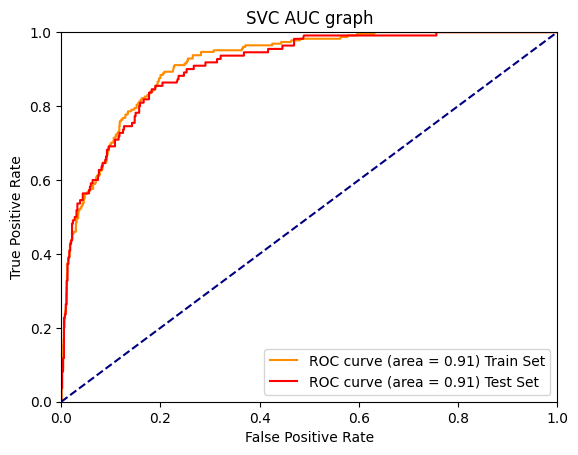

In [74]:
# predict probability
y_test_prob = model.predict_proba(X_test)[:,1]
y_train_prob = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_prob)
fpr_t, tpr_t, __t = metrics.roc_curve(y_test, y_test_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)
roc_auc_t = metrics.auc(fpr_t, tpr_t)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',  label = 'ROC curve (area = %0.2f) Train Set' % roc_auc)
plt.plot(fpr_t, tpr_t, color='red', label = 'ROC curve (area = %0.2f) Test Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC AUC graph')
plt.legend(loc = "lower right")
plt.show()

With the imblanced data set, the models would give decent accuracy scores.

However depending on the model it would give low precision or recall scores.

## Over Sampling

### RandomOverSampler

In [105]:
# balance the dataset with random over sampler
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(X, y)

In [106]:
# test train split
Xres_train, Xres_test, yres_train, yres_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

# check shapes
print(f"X_train: {Xres_train.shape}")
print(f"y_train: {yres_train.shape}")
print(f"X_test: {Xres_test.shape}")
print(f"y_test: {yres_test.shape}")

#check the mean of test and train
print(f"Train Probablity of Response: {yres_train.mean()}")
print(f"Test Probablity of Response: {yres_test.mean()}")

# Data is not imbalanced anymore at 1:1
# setting sample size the same so the trained model can predict from the original model

X_train: (2629, 30)
y_train: (2629,)
X_test: (1127, 30)
y_test: (1127,)
Train Probablity of Response: 0.497907949790795
Test Probablity of Response: 0.5048802129547472


#### Logistic Regression

In [107]:
# Create Logistic Regression Model
model = LogisticRegression(C= 1, penalty = 'l1', solver='liblinear', max_iter=3000, random_state=1)

# Fit Model with balanced data set
model.fit(Xres_train, yres_train)

# predict the train set data
y_train_pred = model.predict(Xres_train)

# finding the scores between y_train and y_predicted with balanced data
print(f"Logistic Regression Model w/ ROS- Train Set")
print(f"Accuracy: {metrics.accuracy_score(yres_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_train, y_train_pred)}")

# accuracy have become lower but precision and recall scores have increased.

Logistic Regression Model w/ ROS- Train Set
Accuracy: 0.82
Precision Score: 0.82
Recall Score: 0.82
Confusion Matrix: [[1090  230]
 [ 238 1071]]


In [112]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Logistic Regression - Balanced', 'Train Set - Balanced', yres_train, y_train_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"


In [113]:
# predict with balanced test set data 
y_test_pred = model.predict(Xres_test)

# finding the test set accuracy score with no threshold
print(f"Logistic Regression Model w/ ROS - Test Set")
print(f"Accuracy: {metrics.accuracy_score(yres_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_test, y_test_pred)}")

Logistic Regression Model w/ ROS - Test Set
Accuracy: 0.81
Precision Score: 0.83
Recall Score: 0.80
Confusion Matrix: [[462  96]
 [115 454]]


In [114]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Logistic Regression - Balanced', 'Test Set - Balanced', yres_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"


In [115]:
# predict with original test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy score with no threshold
print(f"Logistic Regression Model Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# when testing with the original test set the precision score have dropped greatly.

Logistic Regression Model Original - Test Set
Accuracy: 0.82
Precision Score: 0.48
Recall Score: 0.82
Confusion Matrix: [[456  98]
 [ 20  90]]


In [116]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('Logistic Regression - Balanced', 'Test Set', y_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"


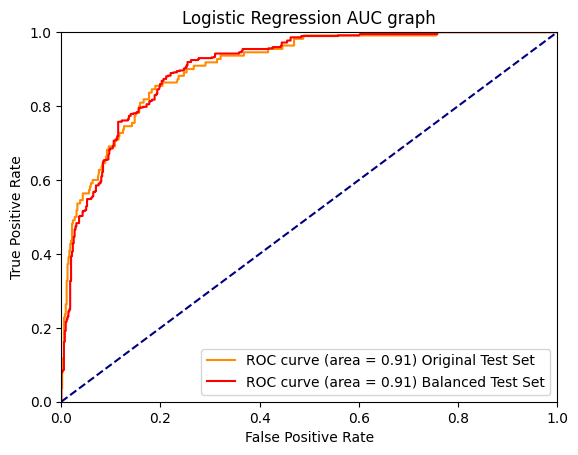

In [117]:
# predict probability
y_test_prob = model.predict_proba(X_test)[:,1]
bal_y_test_prob = model.predict_proba(Xres_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr_t, tpr_t, __t = metrics.roc_curve(y_test, y_test_prob)
bal_fpr_t, bal_tpr_t, bal__t = metrics.roc_curve(yres_test, bal_y_test_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr_t, tpr_t)
roc_auc_t = metrics.auc(bal_fpr_t, bal_tpr_t)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr_t, tpr_t, color='darkorange',  label = 'ROC curve (area = %0.2f) Original Test Set' % roc_auc)
plt.plot(bal_fpr_t, bal_tpr_t, color='red', label = 'ROC curve (area = %0.2f) Balanced Test Set' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression AUC graph')
plt.legend(loc = "lower right")
plt.show()

#### Naive Bayes

In [118]:
# trying other models such as Naiv Bayes
model = GaussianNB()

# Fit Model with balanced data set
model.fit(Xres_train, yres_train)

# predict the train set data
y_train_pred = model.predict(Xres_train)

# finding the scores between y_train and y_predicted with balanced data
print(f"Naive Bayes Model w/ ROS- Train Set")
print(f"Accuracy: {metrics.accuracy_score(yres_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_train, y_train_pred)}")

# Overall the scores are quite low

Naive Bayes Model w/ ROS- Train Set
Accuracy: 0.66
Precision Score: 0.69
Recall Score: 0.57
Confusion Matrix: [[981 339]
 [564 745]]


In [119]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('NB - Balanced', 'Train Set - Balanced', yres_train, y_train_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"
9,NB - Balanced,Train Set - Balanced,0.656523,0.687269,0.569137,"[[981, 339], [564, 745]]"


In [120]:
# predict with balanced test set data 
y_test_pred = model.predict(Xres_test)

# finding the test set accuracy score with no threshold
print(f"Naive Bayes Model w/ ROS - Test Set")
print(f"Accuracy: {metrics.accuracy_score(yres_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_test, y_test_pred)}")

Naive Bayes Model w/ ROS - Test Set
Accuracy: 0.67
Precision Score: 0.71
Recall Score: 0.58
Confusion Matrix: [[425 133]
 [241 328]]


In [121]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('NB - Balanced', 'Test Set - Balanced', yres_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"
9,NB - Balanced,Train Set - Balanced,0.656523,0.687269,0.569137,"[[981, 339], [564, 745]]"


In [122]:
# predict with original test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy score with no threshold
print(f"Naive Bayes Model Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# accuracy improved compared to the balanced test set however precision have dropped greatly.
# I think the accuracy and overall score is really low compared to the Logistic Regression model so I'll stop here.

Naive Bayes Model Original - Test Set
Accuracy: 0.73
Precision Score: 0.33
Recall Score: 0.59
Confusion Matrix: [[420 134]
 [ 45  65]]


In [123]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('NB - Balanced', 'Test Set', y_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"
9,NB - Balanced,Train Set - Balanced,0.656523,0.687269,0.569137,"[[981, 339], [564, 745]]"


#### SVC

In [40]:
# trying other models such as SVC
model = svm.SVC(kernel = 'linear', gamma=0.001, C = 100, random_state=42, probability=True)

# probability to true for prob_pred
model.probability=True

# Fit Model with balanced data set
model.fit(Xres_train, yres_train)

# predict the train set data
y_train_pred = model.predict(Xres_train)

# finding the scores between y_train and y_predicted with balanced data
print(f"SVC Model w/ ROS- Train Set")
print(f"Accuracy: {metrics.accuracy_score(yres_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_train, y_train_pred)}")

# overall lower scores compared to other models

SVC Model w/ ROS- Train Set
Accuracy: 0.72
Precision Score: 0.68
Recall Score: 0.83
Confusion Matrix: [[ 919  590]
 [ 262 1240]]


In [41]:
# predict with balanced test set data 
y_test_pred = model.predict(Xres_test)

# finding the test set accuracy score with no threshold
print(f"SVC w/ ROS - Test Set")
print(f"Accuracy: {metrics.accuracy_score(yres_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_test, y_test_pred)}")

SVC w/ ROS - Test Set
Accuracy: 0.74
Precision Score: 0.71
Recall Score: 0.81
Confusion Matrix: [[251 122]
 [ 74 306]]


In [42]:
# predict with original test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy score with no threshold
print(f"SVC Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# when testing with the original test set the precision score have dropped greatly, recall is 50%.
# results are not as good as logistic regression model.

SVC Original - Test Set
Accuracy: 0.65
Precision Score: 0.28
Recall Score: 0.77
Confusion Matrix: [[237 137]
 [ 16  53]]


In [49]:
# predict with original test set data with threshold
y_test_prob = model.predict_proba(X_test)[:,1]
y_pred = np.array([0 if x < 0.67 else 1 for x in y_test_prob])

# finding the test set accuracy score with no threshold
print(f"Logistic Regression Model Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_pred)}")

# when testing with the original test set the precision score have dropped greatly.

Logistic Regression Model Original - Test Set
Accuracy: 0.80
Precision Score: 0.38
Recall Score: 0.49
Confusion Matrix: [[319  55]
 [ 35  34]]


### SMOTETomek

In [124]:
# balance the dataset by over sampling with SMOTE
smk = SMOTETomek()

# fit data set
X_res, y_res = smk.fit_resample(X, y)

In [125]:
# test train split
Xres_train, Xres_test, yres_train, yres_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# check shapes
print(f"X_train: {Xres_train.shape}")
print(f"y_train: {yres_train.shape}")
print(f"X_test: {Xres_test.shape}")
print(f"y_test: {yres_test.shape}")

#check the mean of test and train
print(f"Train Probablity of Response: {yres_train.mean()}")
print(f"Test Probablity of Response: {yres_test.mean()}")

# Data is not imbalanced anymore at 1:1
# setting sample size the same so the trained model can predict from the original model

X_train: (2532, 30)
y_train: (2532,)
X_test: (1086, 30)
y_test: (1086,)
Train Probablity of Response: 0.5031595576619273
Test Probablity of Response: 0.49263351749539597


#### Logistic Regression

In [126]:
# Create Logistic Regression Model
model = LogisticRegression(C= 1, penalty = 'l1', solver='liblinear', max_iter=3000, random_state=42)

# Fit Model with balanced data set
model.fit(Xres_train, yres_train)

# predict the train set data
y_train_pred = model.predict(Xres_train)

# finding the scores between y_train and y_predicted with balanced data
print(f"Logistic Regression Model w/ SMOTE - Train Set")
print(f"Accuracy: {metrics.accuracy_score(yres_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_train, y_train_pred)}")

# accuracy have become lower but precision and recall scores have increased.

Logistic Regression Model w/ SMOTE - Train Set
Accuracy: 0.88
Precision Score: 0.88
Recall Score: 0.88
Confusion Matrix: [[1103  155]
 [ 157 1117]]


In [127]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('LR - Balanced', 'Train Set - Balanced', yres_train, y_train_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"
9,NB - Balanced,Train Set - Balanced,0.656523,0.687269,0.569137,"[[981, 339], [564, 745]]"


In [128]:
# predict with balanced test set data 
y_test_pred = model.predict(Xres_test)

# finding the test set accuracy score with no threshold
print(f"Logistic Regression Model w/ SMOTE - Test Set")
print(f"Accuracy: {metrics.accuracy_score(yres_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_test, y_test_pred)}")

Logistic Regression Model w/ SMOTE - Test Set
Accuracy: 0.85
Precision Score: 0.87
Recall Score: 0.83
Confusion Matrix: [[484  67]
 [ 92 443]]


In [129]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('LR - Balanced', 'Test Set - Balanced', yres_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"
9,NB - Balanced,Train Set - Balanced,0.656523,0.687269,0.569137,"[[981, 339], [564, 745]]"


In [130]:
# predict with original test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy score with no threshold
print(f"Logistic Regression Model Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# when testing with the original test set the precision score have dropped greatly.

Logistic Regression Model Original - Test Set
Accuracy: 0.84
Precision Score: 0.52
Recall Score: 0.65
Confusion Matrix: [[488  66]
 [ 38  72]]


In [131]:
# add metrics into metrics_df
metrics_df = pd.concat([metrics_df, add_metrics('LR - Balanced', 'Train Set', y_test, y_test_pred)], ignore_index=True)
metrics_df

,Model,Data_set,Accuracy,Precision,Recall,Confusion Matrix
0,Logistic Regression,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
1,Logistic Regression,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
2,Naive Bayes,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
3,Naive Bayes,Test Set,0.762048,0.358824,0.554545,"[[445, 109], [49, 61]]"
4,SVC,Train Set,0.857235,0.527273,0.129464,"[[1298, 26], [195, 29]]"
5,SVC,Test Set,0.841867,0.631579,0.109091,"[[547, 7], [98, 12]]"
6,Logistic Regression - Balanced,Train Set - Balanced,0.821986,0.823213,0.818182,"[[1090, 230], [238, 1071]]"
7,Logistic Regression - Balanced,Test Set - Balanced,0.812777,0.825455,0.797891,"[[462, 96], [115, 454]]"
8,Logistic Regression - Balanced,Test Set,0.822289,0.478723,0.818182,"[[456, 98], [20, 90]]"
9,NB - Balanced,Train Set - Balanced,0.656523,0.687269,0.569137,"[[981, 339], [564, 745]]"


In [61]:
# predict with original test set data
y_test_prob = model.predict_proba(X_test)[:,1]
# testing with threshold
y_pred = np.array([0 if x < 0.62 else 1 for x in y_test_prob])

# finding the test set accuracy score with no threshold
print(f"Logistic Regression Model Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_pred)}")

# when testing with the original test set the precision score have dropped greatly.

Logistic Regression Model Original - Test Set
Accuracy: 0.79
Precision Score: 0.37
Recall Score: 0.49
Confusion Matrix: [[316  58]
 [ 35  34]]


#### Naive Bayes

In [62]:
# trying other models such as Ridge Regression
model = GaussianNB()

# Fit Model with balanced data set
model.fit(Xres_train, yres_train)

# predict the train set data
y_train_pred = model.predict(Xres_train)

# finding the scores between y_train and y_predicted with balanced data
print(f"Naive Bayes Model w/ SMOTE - Train Set")
print(f"Accuracy: {metrics.accuracy_score(yres_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_train, y_train_pred)}")

# Overall the scores are quite low

Naive Bayes Model w/ SMOTE- Train Set
Accuracy: 0.66
Precision Score: 0.68
Recall Score: 0.58
Confusion Matrix: [[1054  389]
 [ 598  832]]


In [64]:
# predict with balanced test set data 
y_test_pred = model.predict(Xres_test)

# finding the test set accuracy score with no threshold
print(f"Naive Bayes Model w/ SMOTE - Test Set")
print(f"Accuracy: {metrics.accuracy_score(yres_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_test, y_test_pred)}")

Naive Bayes Model w/ SMOTE - Test Set
Accuracy: 0.66
Precision Score: 0.70
Recall Score: 0.59
Confusion Matrix: [[259  94]
 [151 215]]


In [65]:
# predict with original test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy score with no threshold
print(f"Naive Bayes Model Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# Ooverall score is really low compared to the Logistic Regression model so I'll stop here.

Naive Bayes Model Original - Test Set
Accuracy: 0.70
Precision Score: 0.27
Recall Score: 0.52
Confusion Matrix: [[275  99]
 [ 33  36]]


#### SVC

In [66]:
# trying other models such as SVC
model = svm.SVC(kernel = 'linear')

# probability = True for predict_prob
model.probability=True

# Fit Model with balanced data set
model.fit(Xres_train, yres_train)

# predict the train set data
y_train_pred = model.predict(Xres_train)

# finding the scores between y_train and y_predicted with balanced data
print(f"SVC Model w/ SMOTE - Train Set")
print(f"Accuracy: {metrics.accuracy_score(yres_train, y_train_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_train, y_train_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_train, y_train_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_train, y_train_pred)}")

# overall lower scores compared to other models

SVC Model w/ SMOTE- Train Set
Accuracy: 0.75
Precision Score: 0.75
Recall Score: 0.74
Confusion Matrix: [[1088  355]
 [ 368 1062]]


In [67]:
# predict with balanced test set data 
y_test_pred = model.predict(Xres_test)

# finding the test set accuracy score with no threshold
print(f"SVC w/ SMOTE - Test Set")
print(f"Accuracy: {metrics.accuracy_score(yres_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(yres_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(yres_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(yres_test, y_test_pred)}")

SVC w/ SMOTE - Test Set
Accuracy: 0.77
Precision Score: 0.77
Recall Score: 0.77
Confusion Matrix: [[270  83]
 [ 85 281]]


In [68]:
# predict with original test set data
y_test_pred = model.predict(X_test)

# finding the test set accuracy score with no threshold
print(f"SVC Original - Test Set")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}\nPrecision Score: {metrics.precision_score(y_test, y_test_pred):.2f}")
print(f"Recall Score: {metrics.recall_score(y_test, y_test_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, y_test_pred)}")

# when testing with the original test set the precision score have dropped greatly, recall is 50%.
# results are not as good as logistic regression model.

SVC Original - Test Set
Accuracy: 0.73
Precision Score: 0.32
Recall Score: 0.65
Confusion Matrix: [[280  94]
 [ 24  45]]
